In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A = 1 - (np.indices((6, 3)).sum(axis=0) % 2)

B = np.arange(1, 25).reshape(6, 4)

B[1::2] = B[1::2, ::-1]

C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

AB = np.hstack((A, B))
CD = np.hstack((C, D))
S = np.vstack((AB, CD))

F = np.zeros((10, 2), dtype=int)

G = np.hstack((S, F))

print(A)
print(B)
print(C)
print(D)
print(S)
print(F)
print(G)

[[1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]]
[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]]
[[ 5  5  6]
 [ 9  5  5]
 [ 6  2 10]
 [ 2 10  3]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[ 1  0  1  1  2  3  4]
 [ 0  1  0  8  7  6  5]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 16 15 14 13]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 24 23 22 21]
 [ 5  5  6  1  0  0  0]
 [ 9  5  5  0  1  0  0]
 [ 6  2 10  0  0  1  0]
 [ 2 10  3  0  0  0  1]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 5  5  6  1  0  0  0  0  0]
 [ 9  5  5  0  1  0  0  0  0]
 [ 6  2 10  0  0  1  0  0  0]
 [ 2 10  3  0  0  0  1  0  0]]


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def find_closest(X, a):

    differences = np.abs(X - a)
    min_index = np.argmin(differences)

    return X.flat[min_index]
if __name__ == "__main__":

    X = np.arange(0, 10).reshape((2, 5))
    a = 3.6

    closest = find_closest(X, a)
    print(f"\nЧисло a: {a}")
    print(f"Ближайший элемент: {closest}")


Число a: 3.6
Ближайший элемент: 4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A = np.array([[1.0, 2.0, 3.0, 4.0],
              [5.0, 6.0, 7.0, 8.0],
              [9.0, 10.0, 11.0, 12.0],
              [13.0, 14.0, 15.0, 16.0]])

b = np.array([0.5, 1.5, -1.0, 2.0])

X = np.array([1.0, 2.0, 3.0, 4.0])

def very_strange_neural_network(A, b, X):
    A_sq = np.matmul(A, A)
    intermediate = np.matmul(X, A_sq)
    output = np.dot(intermediate, b)
    return output
print("A:", A)
print("b:", b)
print("X:", X)
print(very_strange_neural_network(A, b, X))

A: [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
b: [ 0.5  1.5 -1.   2. ]
X: [1. 2. 3. 4.]
11730.0


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [18]:
import numpy as np

def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.sum(np.abs(M[M < 0]))

def find_max_height(M):
    return np.max(M[M > 0])

In [19]:
import numpy as np

def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.sum(np.abs(M[M < 0]))

def find_max_height(M):
    return np.max(M[M > 0])

# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
    return (a[0] == 1) + np.sum(np.diff(a) == 1)

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def count_all_islands(a):
    return (a[0] == 1) + np.sum(np.diff(a) == 1)

import numpy as np

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [26]:
def swap_mask_for_average(X, a):
    avg = int(np.mean(X))
    X = X.copy()
    X[X > a] = avg
    return X

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def swap_mask_for_average(X, a):
    avg = int(np.mean(X))
    X = X.copy()
    X[X > a] = avg
    return X

import numpy as np

M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

print(swap_mask_for_average(M, a))

[[-7 -3 -1  0]
 [-4 -3  1  2]
 [-2  0  4  2]
 [-1  3  2  2]]


## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [30]:
def count_trace_diff(M):
    main_diag_sum = np.trace(M)
    anti_diag_sum = np.trace(np.fliplr(M))
    return main_diag_sum - anti_diag_sum

In [33]:
def count_trace_diff(M):
    main_diag_sum = np.trace(M)
    anti_diag_sum = np.trace(np.fliplr(M))
    return main_diag_sum - anti_diag_sum

import numpy as np

M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

assert np.allclose(count_trace_diff(M), 3)

print(count_trace_diff(M))

3


## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    x = np.concatenate([a, a[::-1]])
    return x[:, None] + x[None, :]

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def create_mountain(a):
    x = np.concatenate([a, a[::-1]])
    return x[:, None] + x[None, :]

# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [39]:
def custom_blur(P, C):
    window_shape = (C, C)
    sub_matrices = np.lib.stride_tricks.sliding_window_view(P, window_shape)
    return sub_matrices.mean(axis=(2, 3))

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def custom_blur(P, C):
    window_shape = (C, C)
    sub_matrices = np.lib.stride_tricks.sliding_window_view(P, window_shape)
    return sub_matrices.mean(axis=(2, 3))

# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2)

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [42]:
def check_successful_broadcast(*matrices):
    def broadcast_shape(shape1, shape2):
        # Returns the broadcasted shape of two shapes, or raises ValueError if they are incompatible
        result = []
        len1, len2 = len(shape1), len(shape2)
        for i in range(1, max(len1, len2) + 1):
            dim1 = shape1[-i] if i <= len1 else 1
            dim2 = shape2[-i] if i <= len2 else 1
            if dim1 == 1 or dim2 == 1 or dim1 == dim2:
                result.append(max(dim1, dim2))
            else:
                raise ValueError("Shapes are not compatible")
        return tuple(reversed(result))

    try:
        result_shape = matrices[0]
        for shape in matrices[1:]:
            result_shape = broadcast_shape(result_shape, shape)
        return True
    except ValueError:
        return False

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def check_successful_broadcast(*matrices):
    def broadcast_shape(shape1, shape2):

        result = []
        len1, len2 = len(shape1), len(shape2)
        for i in range(1, max(len1, len2) + 1):
            dim1 = shape1[-i] if i <= len1 else 1
            dim2 = shape2[-i] if i <= len2 else 1
            if dim1 == 1 or dim2 == 1 or dim1 == dim2:
                result.append(max(dim1, dim2))
            else:
                raise ValueError("Shapes are not compatible")
        return tuple(reversed(result))

    try:
        result_shape = matrices[0]
        for shape in matrices[1:]:
            result_shape = broadcast_shape(result_shape, shape)
        return True
    except ValueError:
        return False

assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах
# Example of an incompatible case
assert not check_successful_broadcast((2, 3), (3, 4))

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [101]:
def pairwise_distances(A, B): return np.sqrt(np.sum((A[:, None] - B[None, :]) ** 2, axis=2))

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pairwise_distances(A, B): return np.sqrt(np.sum((A[:, None] - B[None, :]) ** 2, axis=2))

A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7, 8], [9, 10]])

D = pairwise_distances(A, B)
print(D)

[[ 8.48528137 11.3137085 ]
 [ 5.65685425  8.48528137]
 [ 2.82842712  5.65685425]]


Функция pairwise_distances работает следующим образом: сначала она расширяет размерности матриц A и B, преобразуя A из размера (m, k) в (m, 1, k) с помощью A[:, None] и B из (n, k) в (1, n, k) с помощью B[None, :]. Затем происходит вычитание этих расширенных матриц, что приводит к разностям между каждой парой строк из A и B, результатом чего является массив размером (m, n, k). Далее эти разности возводятся в квадрат для получения квадратов отклонений. После этого выполняется суммирование квадратов по последнему измерению (axis=2), что дает сумму квадратов разностей для каждой пары строк и формирует матрицу размера (m, n). Наконец, из полученных сумм квадратов извлекается квадратный корень с помощью np.sqrt, что дает евклидовы расстояния между строками из A и B.

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.system("curl https://raw.githubusercontent.com/aRTIKa-afk/mipt-py-data/refs/heads/main/data_numpy_lab.csv -o data_numpy_lab.csv")
data = pd.read_csv('./data_numpy_lab.csv')
data.head()

,Unnamed: 0,N,"t, sec","sigma_t, sec","mass, gramm","length, cm","phi, rad"
0,1,4,268,1,180.0,121.0,0.16
1,2,4,264,1,180.0,121.0,0.18
2,3,4,275,1,180.0,121.0,0.16
3,4,4,263,1,180.0,121.0,0.17
4,5,4,267,1,180.0,121.0,0.17


## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [79]:
names_sequence=[]

for name in data.columns:
  names_sequence.append(name.split(',')[0])

names_sequence[0] = 'num'
data.columns = names_sequence

data.loc[data.index,'mass'] /= 1000
data.loc[data.index,'length'] /= 100

assert data.mass.mean() < 0.3

assert all(' ' not in column for column in data.columns)

data.head()

,num,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,1.800000e-49,1.210000e-32,0.16,0.093779,0.000350,0.000597,2.136618e-70,5.870751e-105,4.381157e-107
1,2,4,264,1,1.800000e-49,1.210000e-32,0.18,0.095200,0.000361,0.000682,2.136618e-70,6.806250e-105,5.156250e-107
2,3,4,275,1,1.800000e-49,1.210000e-32,0.16,0.091392,0.000332,0.000582,2.136618e-70,5.575680e-105,4.055040e-107
3,4,4,263,1,1.800000e-49,1.210000e-32,0.17,0.095562,0.000363,0.000646,2.136618e-70,6.477101e-105,4.925552e-107
4,5,4,267,1,1.800000e-49,1.210000e-32,0.17,0.094130,0.000353,0.000637,2.136618e-70,6.284484e-105,4.707479e-107


Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [74]:
g = 9.81
data['omega'] = 2.0 * np.pi * data['N'] / data['t']
data['sigma_omega'] = data['omega'] * data['sigma_t'] / data['t']
data['omega_down'] = data['phi'] / data['t']
data['momentum'] = data['mass'] * g * data['length']
data['momentum_down'] = data['mass'] * data['phi'] * data['length'] * data['length'] / (data['t'] * data['t'])
data['sigma_momentum'] = data['momentum_down']*2.0*data['sigma_t']/data['t']

assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
data.head()


,num,N,t,sigma_t,mass,length,phi,omega,sigma_omega,omega_down,momentum,momentum_down,sigma_momentum
0,1,4,268,1,1.800000e-43,1.210000e-28,0.16,0.093779,0.000350,0.000597,2.136618e-70,5.870751e-105,4.381157e-107
1,2,4,264,1,1.800000e-43,1.210000e-28,0.18,0.095200,0.000361,0.000682,2.136618e-70,6.806250e-105,5.156250e-107
2,3,4,275,1,1.800000e-43,1.210000e-28,0.16,0.091392,0.000332,0.000582,2.136618e-70,5.575680e-105,4.055040e-107
3,4,4,263,1,1.800000e-43,1.210000e-28,0.17,0.095562,0.000363,0.000646,2.136618e-70,6.477101e-105,4.925552e-107
4,5,4,267,1,1.800000e-43,1.210000e-28,0.17,0.094130,0.000353,0.000637,2.136618e-70,6.284484e-105,4.707479e-107


Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [100]:
grouped_data = data.groupby(['mass']).mean()
assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)


AssertionError: 

## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

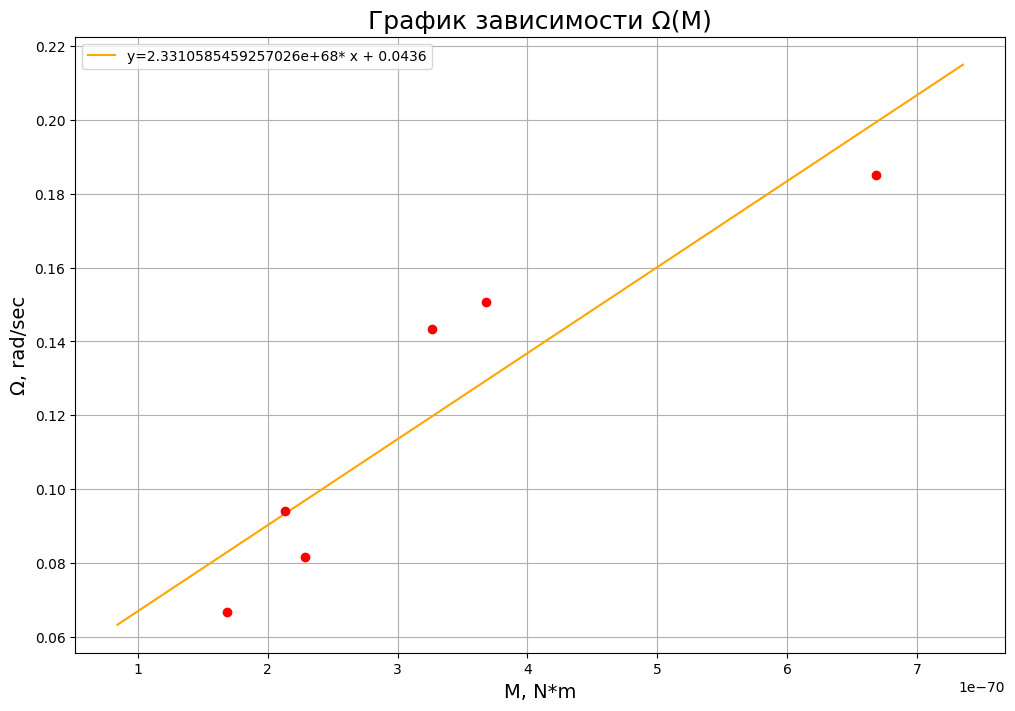

In [98]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

coefs = np.polyfit(momentum_np, omega_np, 1)

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

y_lsq = np.polyval(coefs, x_lsq)

fig = plt.figure(figsize=(12, 8))

coefs = np.round(coefs, 4)
plt.plot(x_lsq, y_lsq, color='orange', label="y=" + str(coefs[0]) + "* x + " + str(coefs[1]))
plt.plot(momentum_np, omega_np, 'ro')  # красные круглые точки
plt.grid(True)
plt.xlabel('M, N*m', fontsize=14)
plt.ylabel('Ω, rad/sec', fontsize=14)
plt.title('График зависимости Ω(M)', fontsize=18)
plt.legend()
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [ ]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
iris = # TODO
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

# TODO
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
# TODO

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

In [ ]:
# TODO

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

In [ ]:
#TODO

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

In [ ]:
# TODO

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

In [ ]:
# TODO

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

In [ ]:
# TODO

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>